FODS :- Machine Learning Model Implementation.

Dataset Chosen:- Superhero Data 
Model Used :- Clustering

In [1]:
# Importing all required libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"
from sklearn.metrics import davies_bouldin_score

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [23]:
# Import the dataset.

df = pd.read_csv("superheroes_data.csv")

# Preview the dataset.

df.head()


,id,name,intelligence,strength,speed,durability,power,combat,full-name,alter-egos,...,race,height,weight,eye-color,hair-color,occupation,base,group-affiliation,relatives,url
0,1,A-Bomb,38.0,100.0,17.0,80.0,24.0,64.0,Richard Milhouse Jones,No alter egos found.,...,Human,"[""6'8"", '203 cm']","['980 lb', '441 kg']",Yellow,No Hair,"Musician, adventurer, author; formerly talk sh...",-,"Hulk Family; Excelsior (sponsor), Avengers (ho...",Marlo Chandler-Jones (wife); Polly (aunt); Mrs...,https://www.superherodb.com/pictures2/portrait...
1,2,Abe Sapien,88.0,28.0,35.0,65.0,100.0,85.0,Abraham Sapien,No alter egos found.,...,Icthyo Sapien,"[""6'3"", '191 cm']","['145 lb', '65 kg']",Blue,No Hair,Paranormal Investigator,-,Bureau for Paranormal Research and Defense,"Edith Howard (wife, deceased)",https://www.superherodb.com/pictures2/portrait...
2,3,Abin Sur,50.0,90.0,53.0,64.0,99.0,65.0,NaN,No alter egos found.,...,Ungaran,"[""6'1"", '185 cm']","['200 lb', '90 kg']",Blue,No Hair,"Green Lantern, former history professor",Oa,"Green Lantern Corps, Black Lantern Corps","Amon Sur (son), Arin Sur (sister), Thaal Sines...",https://www.superherodb.com/pictures2/portrait...
3,4,Abomination,63.0,80.0,53.0,90.0,62.0,95.0,Emil Blonsky,No alter egos found.,...,Human / Radiation,"[""6'8"", '203 cm']","['980 lb', '441 kg']",Green,No Hair,Ex-Spy,Mobile,former member of the crew of the Andromeda Sta...,"Nadia Dornova Blonsky (wife, separated)",https://www.superherodb.com/pictures2/portrait...
4,5,Abraxas,88.0,63.0,83.0,100.0,100.0,55.0,Abraxas,No alter egos found.,...,Cosmic Entity,"['-', '0 cm']","['- lb', '0 kg']",Blue,Black,Dimensional destroyer,-,Cosmic Beings,"Eternity (""Father"")",https://www.superherodb.com/pictures2/portrait...


In [3]:
# View the summary of the dataset.

df.info()

# View the shape of the dataset.

df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 731 non-null    int64  
 1   name               731 non-null    object 
 2   intelligence       566 non-null    float64
 3   strength           629 non-null    float64
 4   speed              566 non-null    float64
 5   durability         566 non-null    float64
 6   power              566 non-null    float64
 7   combat             566 non-null    float64
 8   full-name          630 non-null    object 
 9   alter-egos         731 non-null    object 
 10  aliases            731 non-null    object 
 11  place-of-birth     731 non-null    object 
 12  first-appearance   731 non-null    object 
 13  publisher          716 non-null    object 
 14  alignment          731 non-null    object 
 15  gender             731 non-null    object 
 16  race               429 non

(731, 26)

In [4]:
# Trim the original dataset to include only the required features.

df = df[["name", "intelligence", "strength", "speed", "durability", "power", "combat"]]

# Preview the dataset.

df.head()

,name,intelligence,strength,speed,durability,power,combat
0,A-Bomb,38.0,100.0,17.0,80.0,24.0,64.0
1,Abe Sapien,88.0,28.0,35.0,65.0,100.0,85.0
2,Abin Sur,50.0,90.0,53.0,64.0,99.0,65.0
3,Abomination,63.0,80.0,53.0,90.0,62.0,95.0
4,Abraxas,88.0,63.0,83.0,100.0,100.0,55.0


In [5]:
# View the summary of the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          731 non-null    object 
 1   intelligence  566 non-null    float64
 2   strength      629 non-null    float64
 3   speed         566 non-null    float64
 4   durability    566 non-null    float64
 5   power         566 non-null    float64
 6   combat        566 non-null    float64
dtypes: float64(6), object(1)
memory usage: 40.1+ KB


In [6]:
# Check for missing values. 

df.isnull().sum()

name              0
intelligence    165
strength        102
speed           165
durability      165
power           165
combat          165
dtype: int64

In [7]:
# Drop all the rows having NULL or missing values.

df = df.dropna()

# Check whether there are duplicate entries in the dataset.

df[df.duplicated('name')]

# Remove all duplicates and keep only the first instance in each case. Here. the duplicates are removed based on the 'name' column. 

df = df.apply(lambda x : x.astype(str).str.lower()).drop_duplicates(subset=['name'], keep='first')

In [8]:
# Preview the dataset.

df.head()

,name,intelligence,strength,speed,durability,power,combat
0,a-bomb,38.0,100.0,17.0,80.0,24.0,64.0
1,abe sapien,88.0,28.0,35.0,65.0,100.0,85.0
2,abin sur,50.0,90.0,53.0,64.0,99.0,65.0
3,abomination,63.0,80.0,53.0,90.0,62.0,95.0
4,abraxas,88.0,63.0,83.0,100.0,100.0,55.0


In [9]:
# View the summary of the modified dataset.

df.info()

# View the shape of the modified dataset.

df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 558 entries, 0 to 730
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          558 non-null    object
 1   intelligence  558 non-null    object
 2   strength      558 non-null    object
 3   speed         558 non-null    object
 4   durability    558 non-null    object
 5   power         558 non-null    object
 6   combat        558 non-null    object
dtypes: object(7)
memory usage: 34.9+ KB


(558, 7)

In [10]:
# While running the info() in the above cell, we notice that the datatype of our numeric attributes have been converted into the 'object' type. Since it is not possible to run the corr() on non-numeric features, we now convert the datatype of the attributes into numeric (float64). 

df[["intelligence", "strength", "speed", "durability", "power", "combat"]] = df[["intelligence", "strength", "speed", "durability", "power", "combat"]].apply(pd.to_numeric)

In [11]:
# View the summary of the type converted dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 558 entries, 0 to 730
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          558 non-null    object 
 1   intelligence  558 non-null    float64
 2   strength      558 non-null    float64
 3   speed         558 non-null    float64
 4   durability    558 non-null    float64
 5   power         558 non-null    float64
 6   combat        558 non-null    float64
dtypes: float64(6), object(1)
memory usage: 34.9+ KB


In [12]:
# View the statistical summary of the dataset.

df.describe()

,intelligence,strength,speed,durability,power,combat
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000
mean,64.385305,41.777778,40.075269,58.763441,64.189964,61.517921
std,20.022078,33.210510,24.403506,30.041825,29.762491,23.341171
min,6.000000,4.000000,1.000000,1.000000,0.000000,5.000000
25%,50.000000,10.000000,23.000000,30.000000,38.000000,42.000000
50%,63.000000,32.000000,33.000000,60.000000,63.500000,64.000000
75%,75.000000,76.500000,50.000000,88.000000,100.000000,80.000000
max,100.000000,100.000000,100.000000,110.000000,100.000000,101.000000


In [13]:
# Calculate the correlation between the different features in the dataset.

df.corr(numeric_only=True)

,intelligence,strength,speed,durability,power,combat
intelligence,1.000000,0.200351,0.181403,0.191263,0.252820,0.328172
strength,0.200351,1.000000,0.502922,0.680582,0.450979,0.241184
speed,0.181403,0.502922,1.000000,0.471614,0.441073,0.180298
durability,0.191263,0.680582,0.471614,1.000000,0.508891,0.215719
power,0.252820,0.450979,0.441073,0.508891,1.000000,0.149629
combat,0.328172,0.241184,0.180298,0.215719,0.149629,1.000000


In [14]:
# Graphical representation of the correlation matrix.

correlation_fig = px.imshow(df.corr(numeric_only='True'), 
                            title='Correlation Heatmap')
correlation_fig.show()

In [15]:
# Using the KMeans Clustering Technique to classify the dataset.

df1 = df[["intelligence", "strength", "speed", "durability", "power", "combat"]]

from sklearn.preprocessing import MinMaxScaler
for i in df1.columns:
    MinMaxScaler(i)
    
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit_predict(df1)
kmeans.fit_predict(df1)

df["Power Rank"] = clusters
MinMaxScaler(df["Power Rank"])
df["Power Rank"] = df["Power Rank"].map({1: "Cluster 1", 2: 
    "Cluster 2", 3: "Cluster 3", 4: "Cluster 4", 5: "Cluster 5", 
    6: "Cluster 6", 7: "Cluster 7", 8: "Cluster 8", 
    9: "Cluster 9", 10: "Cluster 10", 11: "Cluster 11"})


In [16]:
df.shape
df.head()

,name,intelligence,strength,speed,durability,power,combat,Power Rank
0,a-bomb,38.0,100.0,17.0,80.0,24.0,64.0,Cluster 5
1,abe sapien,88.0,28.0,35.0,65.0,100.0,85.0,Cluster 9
2,abin sur,50.0,90.0,53.0,64.0,99.0,65.0,Cluster 4
3,abomination,63.0,80.0,53.0,90.0,62.0,95.0,Cluster 4
4,abraxas,88.0,63.0,83.0,100.0,100.0,55.0,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 558 entries, 0 to 730
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          558 non-null    object 
 1   intelligence  558 non-null    float64
 2   strength      558 non-null    float64
 3   speed         558 non-null    float64
 4   durability    558 non-null    float64
 5   power         558 non-null    float64
 6   combat        558 non-null    float64
 7   Power Rank    499 non-null    object 
dtypes: float64(6), object(2)
memory usage: 39.2+ KB


In [18]:
# Evaluating the K-Means Model using the Davies-Bouldin Index.

label = kmeans.labels_
db_index = davies_bouldin_score(df1, label)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 1.4756205628997499


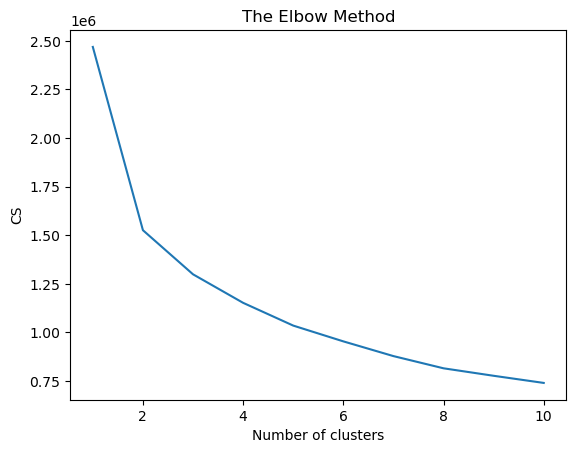

In [19]:
# Using the Elbow Method to find the optimal number of clusters.

cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df1)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

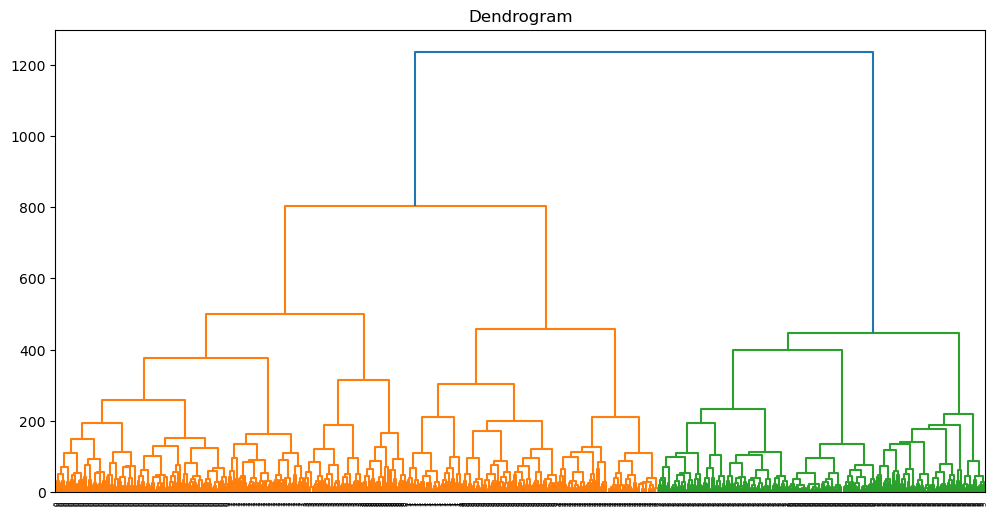

In [20]:
# Using Agglomerative Clustering to cross validate the model.

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

agg_clustering = AgglomerativeClustering(n_clusters=10)
agg_clustering.fit(df1)

labels = agg_clustering.labels_

linkage_matrix = linkage(df1, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, orientation="top", labels=labels, distance_sort='descending')
plt.title('Dendrogram')
plt.show()

In [21]:
# Evaluating the Aggloremative clustering Model using the Davies-Bouldin Index.

db_index = davies_bouldin_score(df1, labels)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 1.4831263994642672
